The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In this data set we are going to predict and analyze the avaerage price and region considering them as target variable

In [257]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [258]:
#loading the dataset
df=pd.read_csv("avacado.csv")
#lets see insights of the data sets
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [259]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [260]:
#checking the data types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [261]:
#checking the column values
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [262]:
#Checking the shape
df.shape

(1517, 14)

In [263]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


So in this dataset we have 1517 rows and 14 columns and no null values are present

In [264]:
#Observations
#Date - The date of the observation
#AveragePrice - the average price of a single avocado
#type - conventional or organic
#year - the year
#Region - the city or region of the observation
#Total Volume - Total number of avocados sold
#4046 - Total number of avocados with PLU 4046 sold
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold
#Totalbags-total bags sold on respective dates
#Small Bags-total number of small bags sold respective dates
#Large Bags-total number of large bags sold respective dates
#XLarge Bags-total number of Xlarge bags sold respective dates

# Summary statistics

In [265]:
df.describe(include="all")

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,NaN,05-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,26.995386,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,14.848287,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,0.000000,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,14.000000,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,29.000000,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,39.000000,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [266]:
#values are recorded on 104 unique dates
#average price varies from .49 to 1.68
#price is normally distributed and thier is a large difference between 75% and max so chances of outliers are high
#there are 51 unique regions
#only conventional type is present
#values are recorded on 2 years of 2015 and 2016

In [267]:
#checking the unique year
print("Number of unique years:",df["year"].unique())
print("Number of values each year" ,df["year"].value_counts())

Number of unique years: [2015 2016]
Number of values each year 2015    1270
2016     247
Name: year, dtype: int64


<AxesSubplot:>

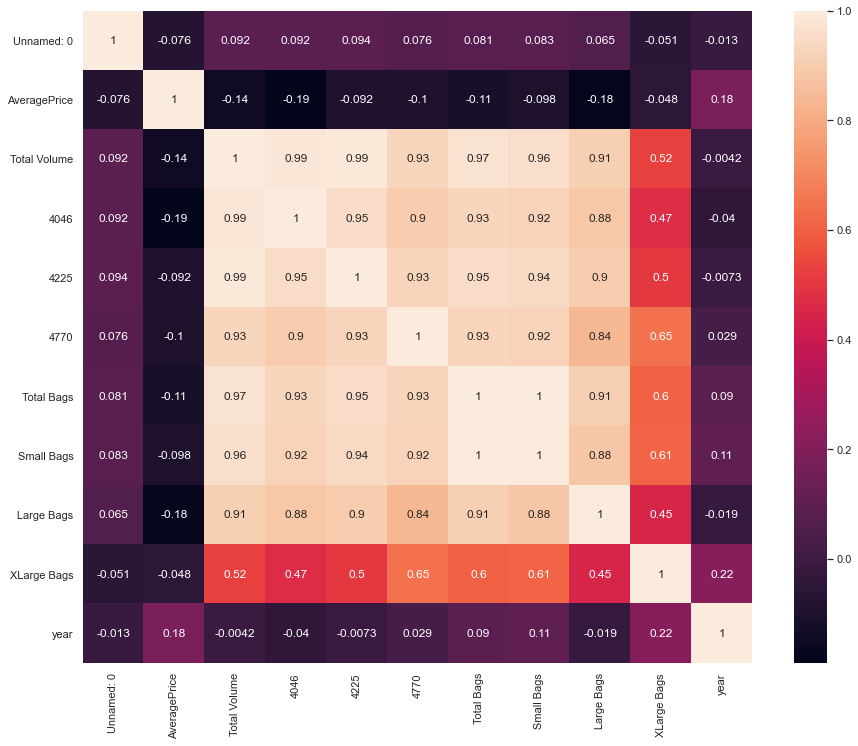

In [268]:
#checking the correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [269]:
#there is an unamed column which needs to be removed and remaining all have good corelation with target variable

In [270]:
#droping the column
df.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [271]:
#for better analysis we will convert the object type of date into date format
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 154.2+ KB


In [272]:

#Create new columns for month since we have a column of year already
df['Month']=df['Date'].dt.month


In [273]:

#Check value counts of Month
df['Month'].value_counts()

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: Month, dtype: int64

# Univariant analysis

In [274]:
#Check head to verify the data
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


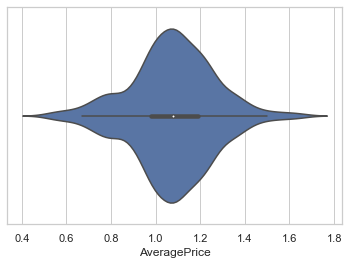

In [275]:
#analysis of average price
sns.set(style="whitegrid")
sns.violinplot(df["AveragePrice"])
plt.show()

In [276]:
#maximum average price is in range 1 to 1.2


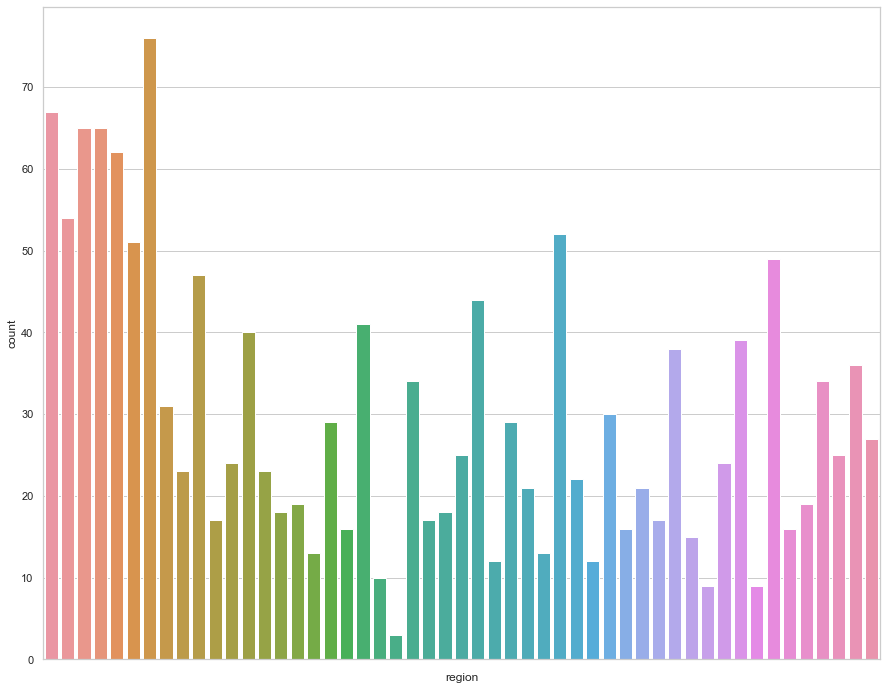

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [277]:
#analysis of the regions
plt.figure(figsize=(15,12))
sns.set(style="whitegrid")
sns.countplot(df["region"]).set(xticklabels=[])
plt.show()
max1=df["region"].value_counts()
print(max1)
print("california region has maximum frequncy of:",max1.max())
print("LosAngeles region has minimum frequncy of:",max1.min())

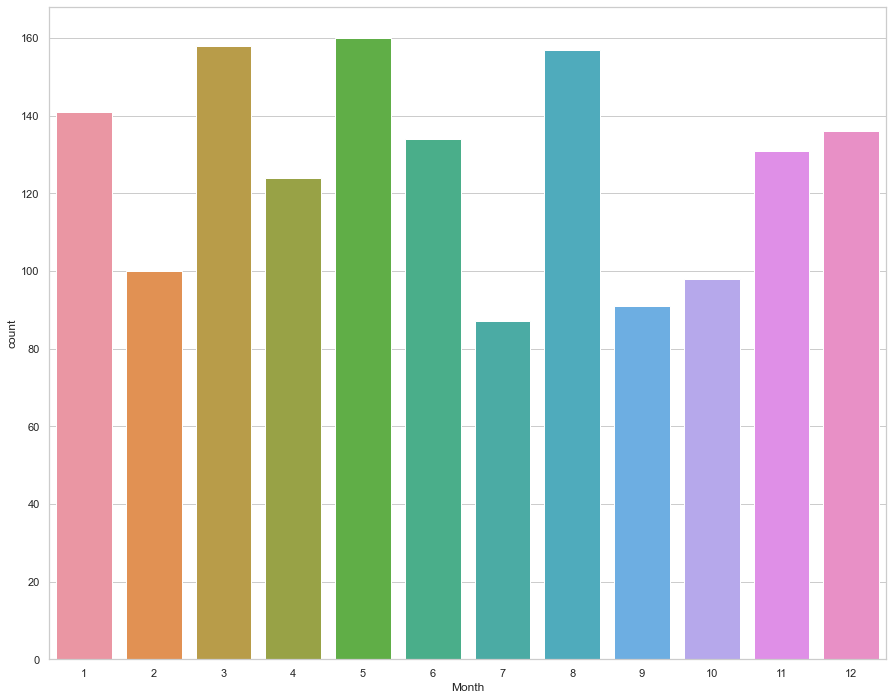

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: Month, dtype: int64
5th month has maximum frequncy of: 160
7th month has minimum frequncy of: 87


In [278]:
#analysis of the month
plt.figure(figsize=(15,12))
sns.set(style="whitegrid")
sns.countplot(df["Month"])
plt.show()
max1=df["Month"].value_counts()
print(max1)
print("5th month has maximum frequncy of:",max1.max())
print("7th month has minimum frequncy of:",max1.min())

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>]],
      dtype=object)

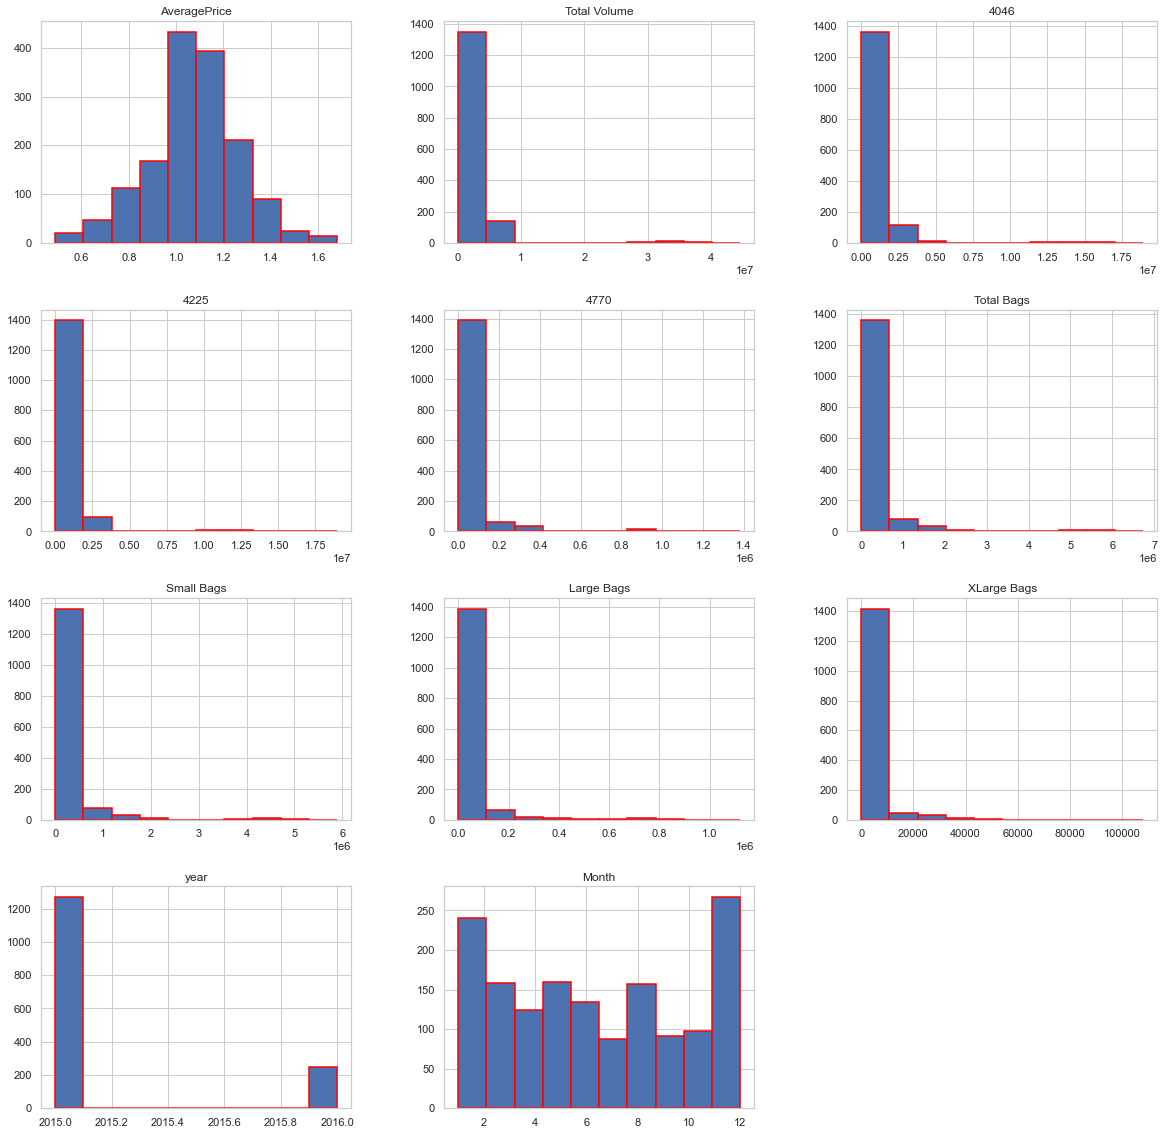

In [279]:
#checking the all the coulumns
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

In [280]:
 # most of the columns are skewd 

# Bi-Variant analysis

In [281]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


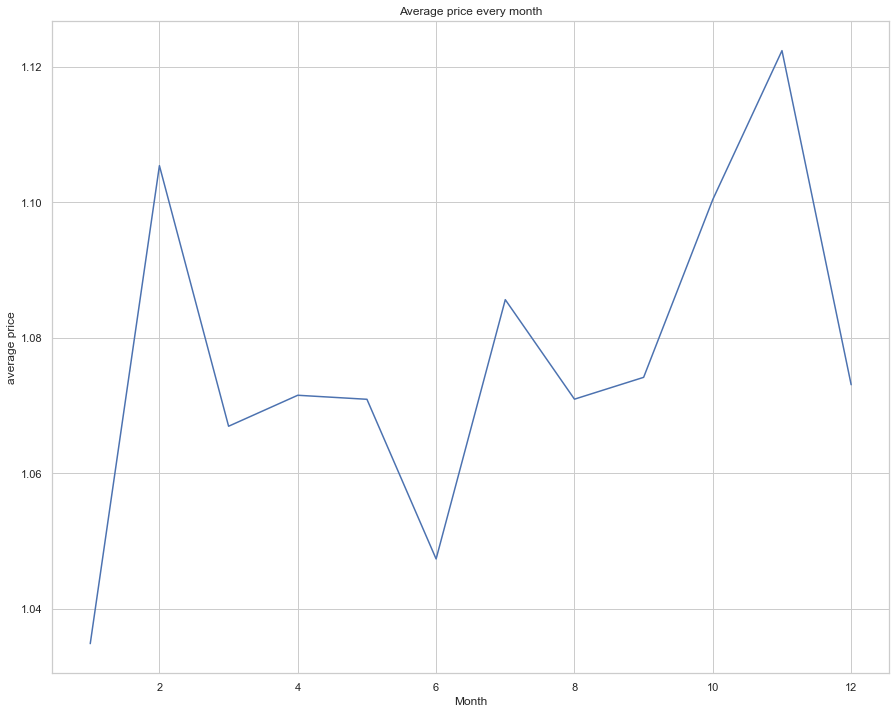

In [282]:
#analysis of average price each month 
av_and_month=df.groupby('Month').mean()["AveragePrice"]
month=range(1,13)
plt.figure(figsize=(15,12))
plt.title("Average price every month")
plt.xlabel("Month")
plt.ylabel("average price")
plt.plot(month,av_and_month)
plt.show()

In [283]:
#average price is lowest in the 1st month
#average price is highest in the 11th month

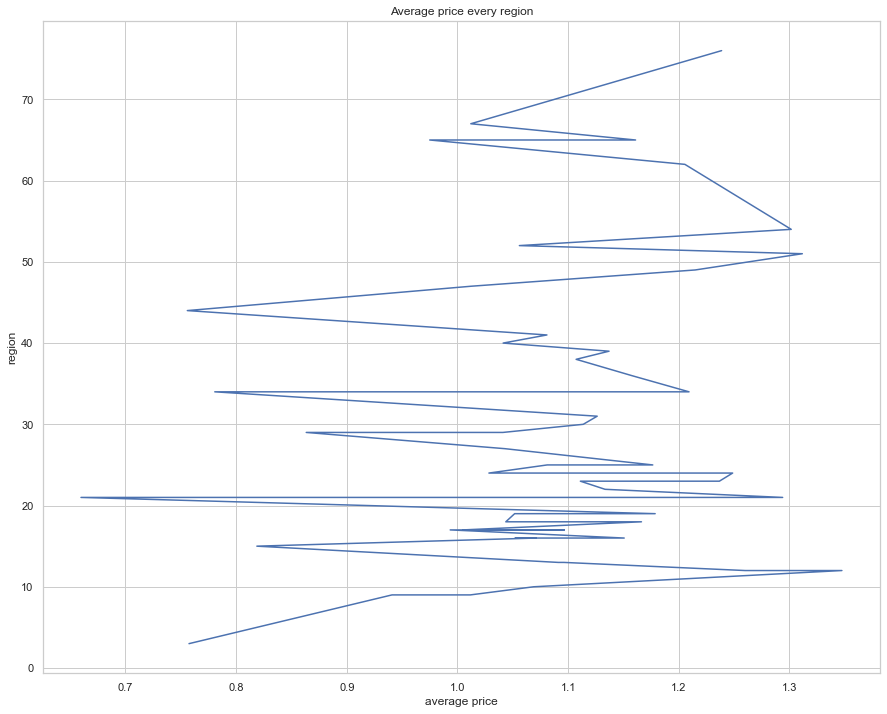

maximum average price is in  
           AveragePrice
region                
Syracuse      1.347368


minimum average price is in  
                AveragePrice
region                     
PhoenixTucson      0.659808


In [284]:
#analysis of average price each region
av_and_region=df.groupby('region').mean()["AveragePrice"]

plt.figure(figsize=(15,12))
plt.title("Average price every region")
plt.xlabel("average price")
plt.ylabel("region")
plt.plot(av_and_region,df["region"].value_counts())
plt.show()
a=pd.DataFrame(av_and_region)
#Observation
print("maximum average price is in ","\n",a[a.AveragePrice == a.AveragePrice.max()]) 
print("\n")
print("minimum average price is in ","\n",a[a.AveragePrice == a.AveragePrice.min()]) 

In [285]:
#will drop few unessasry columns
list1=["Date","type"]
for i in list1:
    df.drop(labels=i, axis=1,inplace=True)

In [286]:
#Analysis of total volumne of avacaodo and its different types sold each month
df1 = df.groupby(['Month']).agg({"Total Volume":"sum","4046":"sum","4225":"sum", "4770":"sum"})
df1=pd.DataFrame(df1)
df1

,Total Volume,4046,4225,4770
Month,,,,
1,2.709289e+08,1.052402e+08,1.106519e+08,7915193.57
2,1.518207e+08,6.041852e+07,5.567515e+07,4736333.30
3,2.864619e+08,1.086317e+08,1.162882e+08,9469814.84
4,2.225624e+08,9.158678e+07,8.485384e+07,6982008.99
5,3.212220e+08,1.448755e+08,1.124444e+08,10536503.27
6,2.382439e+08,1.017034e+08,8.519859e+07,7632180.05
7,1.610989e+08,6.751989e+07,5.796773e+07,5497559.38
8,2.255813e+08,8.973917e+07,8.907440e+07,6327070.83
9,1.026004e+08,3.738673e+07,4.352177e+07,3036352.94


Text(0.5, 1.0, 'Monthly distribution of  4770 type consumption')

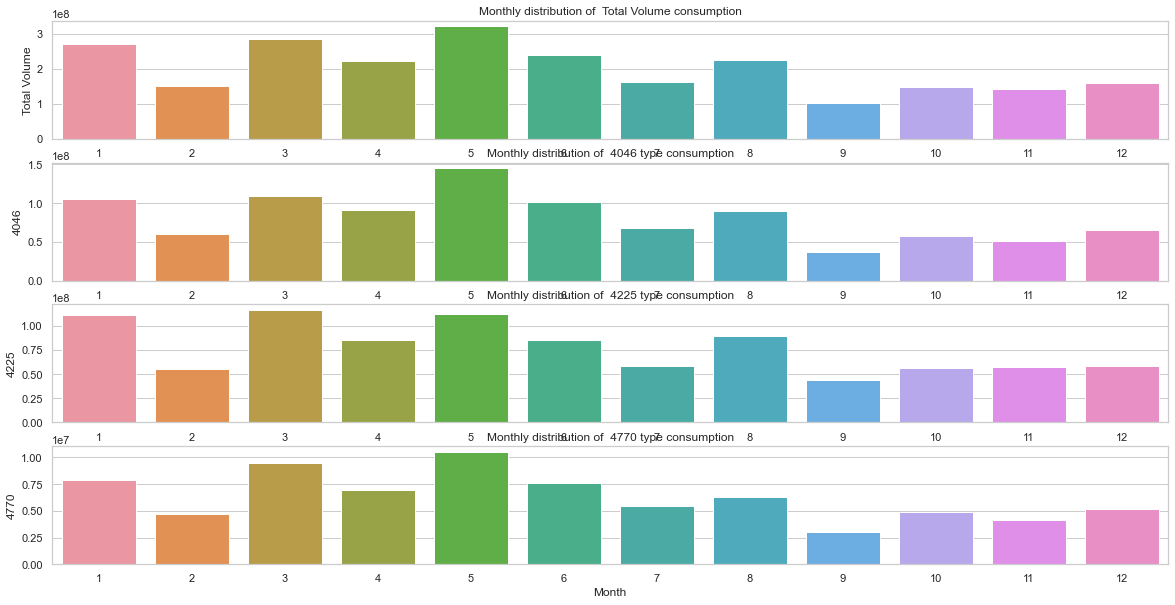

In [287]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,10))
sns.barplot(x=df1.index,y=df1["Total Volume"],ax=ax1)
ax1.set_title("Monthly distribution of  Total Volume consumption")
sns.barplot(x=df1.index,y=df1["4046"],ax=ax2)
ax2.set_title("Monthly distribution of  4046 type consumption")
sns.barplot(x=df1.index,y=df1["4225"],ax=ax3)
ax3.set_title("Monthly distribution of  4225 type consumption")
sns.barplot(x=df1.index,y=df1["4770"],ax=ax4)
ax4.set_title("Monthly distribution of  4770 type consumption")

In [288]:
#observations
Total_consumption_of_avacado=df1["Total Volume"].sum()
Total_consumption_of_4225type_avacado=df1["4225"].sum()
Total_consumption_of_4046type_avacado=df1["4046"].sum()
Total_consumption_of_4770type_avacado=df1["4770"].sum()
print("Total consumption of avacado is",Total_consumption_of_avacado)
print("Total consumption of 4225 type avacado",Total_consumption_of_4225type_avacado, ",so percentage of 4225 is",(Total_consumption_of_4225type_avacado/Total_consumption_of_avacado)*100)
print("Total consumption of 4046 type avacado",Total_consumption_of_4046type_avacado, ",so percentage of 4046 is",(Total_consumption_of_4046type_avacado/Total_consumption_of_avacado)*100)
print("Total consumption of 4225 type avacado",Total_consumption_of_4770type_avacado, ",so percentage of 4770 is",(Total_consumption_of_4770type_avacado/Total_consumption_of_avacado)*100)

Total consumption of avacado is 2430050545.9099994
Total consumption of 4225 type avacado 927550691.4300001 ,so percentage of 4225 is 38.17001638057093
Total consumption of 4046 type avacado 980647438.29 ,so percentage of 4046 is 40.35502224184269
Total consumption of 4225 type avacado 76465136.52 ,so percentage of 4770 is 3.1466479842856736


In [289]:
##Analysis of total bags of avacaodo and its different types sold each month
df2 = df.groupby(['Month']).agg({"Total Bags":"sum","Small Bags":"sum","Large Bags":"sum", "XLarge Bags":"sum"})
df2=pd.DataFrame(df2)
df2

,Total Bags,Small Bags,Large Bags,XLarge Bags
Month,,,,
1,47121589.41,38662577.78,8178534.88,280476.75
2,30990736.65,26915856.19,3935484.11,139396.35
3,52072142.15,44760401.78,6972783.97,338956.40
4,39139767.28,32952328.26,5914112.83,273326.19
5,53365558.17,46225266.95,6790773.38,349517.84
6,43709745.82,37236228.12,6184010.09,289507.61
7,30113746.18,25702660.68,4118739.43,292346.07
8,40440658.56,34745633.02,5396875.10,298150.44
9,18655539.17,15182053.90,3276842.50,196642.77


Text(0.5, 1.0, 'Monthly distribution of  XLarge Bags sold')

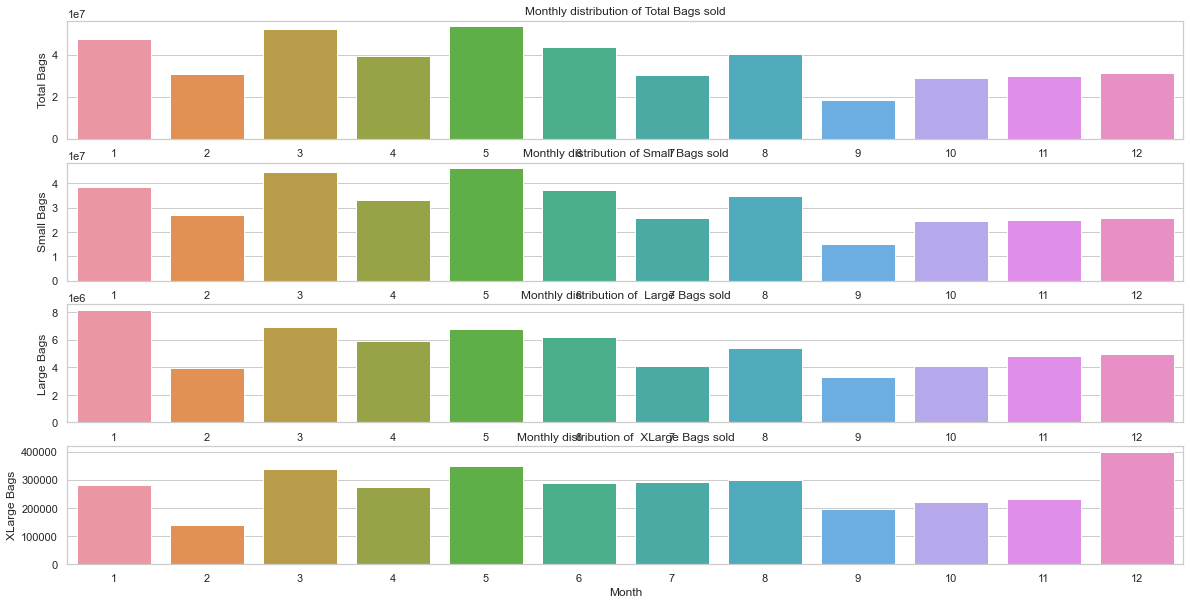

In [290]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,10))
sns.barplot(x=df2.index,y=df2["Total Bags"],ax=ax1)
ax1.set_title("Monthly distribution of Total Bags sold")
sns.barplot(x=df2.index,y=df2["Small Bags"],ax=ax2)
ax2.set_title("Monthly distribution of Small Bags sold")
sns.barplot(x=df2.index,y=df2["Large Bags"],ax=ax3)
ax3.set_title("Monthly distribution of  Large Bags sold")
sns.barplot(x=df2.index,y=df2["XLarge Bags"],ax=ax4)
ax4.set_title("Monthly distribution of  XLarge Bags sold")

In [291]:
#observations
Total_consumption_of_avacado_Total_Bags=df2["Total Bags"].sum()
Total_consumption_of_Small_Bags_avacado=df2["Small Bags"].sum()
Total_consumption_of_Large_Bags_avacado=df2["Large Bags"].sum()
Total_consumption_of_XLarge_Bags_avacado=df2["XLarge Bags"].sum()
print("Total bags of avacado is",Total_consumption_of_avacado_Total_Bags)
print("Total small bags  avacado",Total_consumption_of_Small_Bags_avacado, ",so percentage of small bags is",(Total_consumption_of_Small_Bags_avacado/Total_consumption_of_avacado_Total_Bags)*100)
print("Total large bags avacado",Total_consumption_of_Large_Bags_avacado, ",so percentage of large bags is",(Total_consumption_of_Large_Bags_avacado/Total_consumption_of_avacado_Total_Bags)*100)
print("Total Xlarge bags  avacado",Total_consumption_of_XLarge_Bags_avacado, ",so percentage of Xlarge bags is",(Total_consumption_of_XLarge_Bags_avacado/Total_consumption_of_avacado_Total_Bags)*100)

Total bags of avacado is 445387279.67
Total small bags  avacado 377389544.04999995 ,so percentage of small bags is 84.7328968015473
Total large bags avacado 64687988.89999999 ,so percentage of large bags is 14.523986618551197
Total Xlarge bags  avacado 3309746.7199999997 ,so percentage of Xlarge bags is 0.7431165799014925


In [292]:
#Analysis of total bags of avacaodo and its different types sold each region
df3 = df.groupby(['region']).agg({"Total Bags":"sum","Small Bags":"sum","Large Bags":"sum", "XLarge Bags":"sum"})
df3=pd.DataFrame(df3)
df3.drop(labels="TotalUS",inplace=True)#need to drop total us row
df3

,Total Bags,Small Bags,Large Bags,XLarge Bags
region,,,,
Albany,8.151414e+05,791638.22,23265.54,237.66
Atlanta,4.655737e+06,2560139.29,2092341.37,3256.55
BaltimoreWashington,1.200439e+07,11712284.14,274394.07,17711.40
Boise,1.693533e+06,1642547.60,48642.24,2343.66
Boston,7.586084e+06,7502993.05,47420.62,35670.27
BuffaloRochester,3.397356e+06,3342930.30,19601.98,34824.16
California,1.075493e+08,97794801.75,8326194.48,1428264.97
Charlotte,1.797625e+06,1634004.88,162146.36,1473.61
Chicago,2.260864e+06,2178184.42,70406.78,12272.83


Text(0.5, 1.0, 'regional distribution of  XLarge Bags sold')

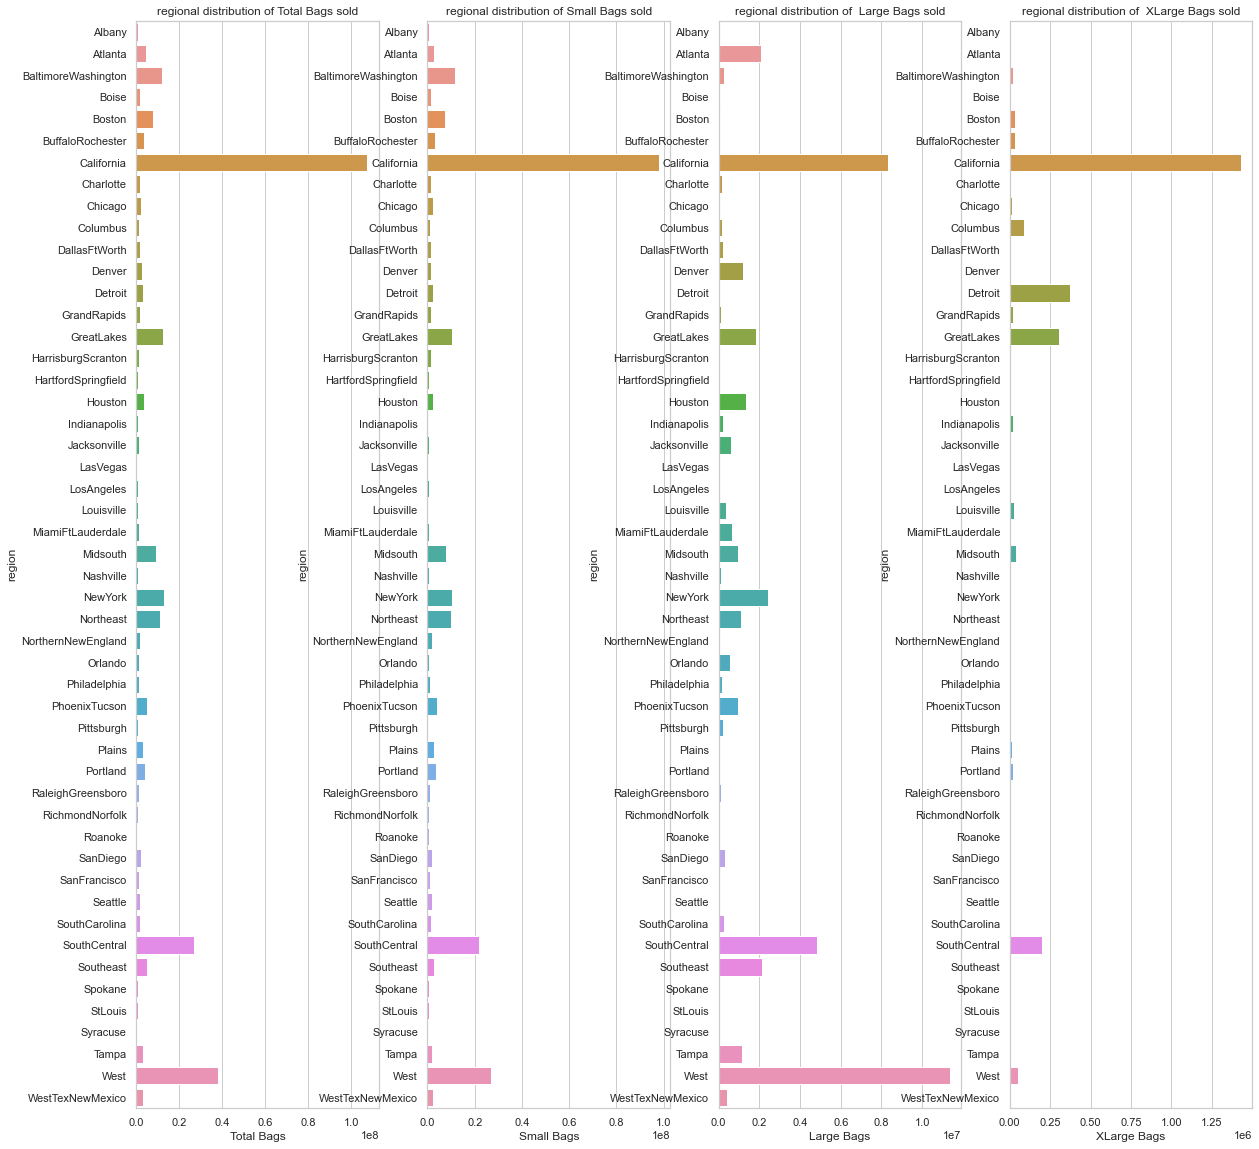

In [293]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))
sns.barplot(x=df3["Total Bags"],y=df3.index,ax=ax1)
ax1.set_title("regional distribution of Total Bags sold")
sns.barplot(x=df3["Small Bags"],y=df3.index,ax=ax2)
ax2.set_title("regional distribution of Small Bags sold")
sns.barplot(x=df3["Large Bags"],y=df3.index,ax=ax3)
ax3.set_title("regional distribution of  Large Bags sold")
sns.barplot(x=df3["XLarge Bags"],y=df3.index,ax=ax4)
ax4.set_title("regional distribution of  XLarge Bags sold")

In [294]:
#Observation
print("maximum number of bags sold","\n",df3[df3["Total Bags"] == df3["Total Bags"].max()]  )
print("\n")
print("mainimum number of bags sold","\n",df3[df3["Total Bags"] == df3["Total Bags"].min()]  )

maximum number of bags sold 
              Total Bags   Small Bags  Large Bags  XLarge Bags
region                                                       
California  107549261.2  97794801.75  8326194.48   1428264.97


mainimum number of bags sold 
           Total Bags  Small Bags  Large Bags  XLarge Bags
region                                                   
LasVegas   367812.02   362788.85     5023.17          0.0


In [295]:
#Analysis of total volumne of avacaodo and its different types sold each region
df4 = df.groupby(['region']).agg({"Total Volume":"sum","4046":"sum","4225":"sum", "4770":"sum"})
df4=pd.DataFrame(df4)
df4.drop(labels="TotalUS",inplace=True)#need to drop total us row
df4

,Total Volume,4046,4225,4770
region,,,,
Albany,5.111443e+06,1.160478e+05,4.144253e+06,36001.05
Atlanta,2.525241e+07,1.736038e+07,3.188675e+06,47617.71
BaltimoreWashington,5.249687e+07,3.811506e+06,3.420130e+07,2479680.24
Boise,5.268001e+06,2.781901e+06,4.200372e+05,372529.65
Boston,3.431443e+07,4.619336e+05,2.495051e+07,1315901.45
BuffaloRochester,6.741403e+06,8.039075e+04,3.253675e+06,9980.56
California,4.586810e+08,1.831613e+08,1.508466e+08,17123902.95
Charlotte,5.464623e+06,1.343049e+06,1.395879e+06,928069.90
Chicago,1.867329e+07,8.773167e+05,1.306783e+07,2467283.51


Text(0.5, 1.0, 'regional distribution of  4770 type consumption')

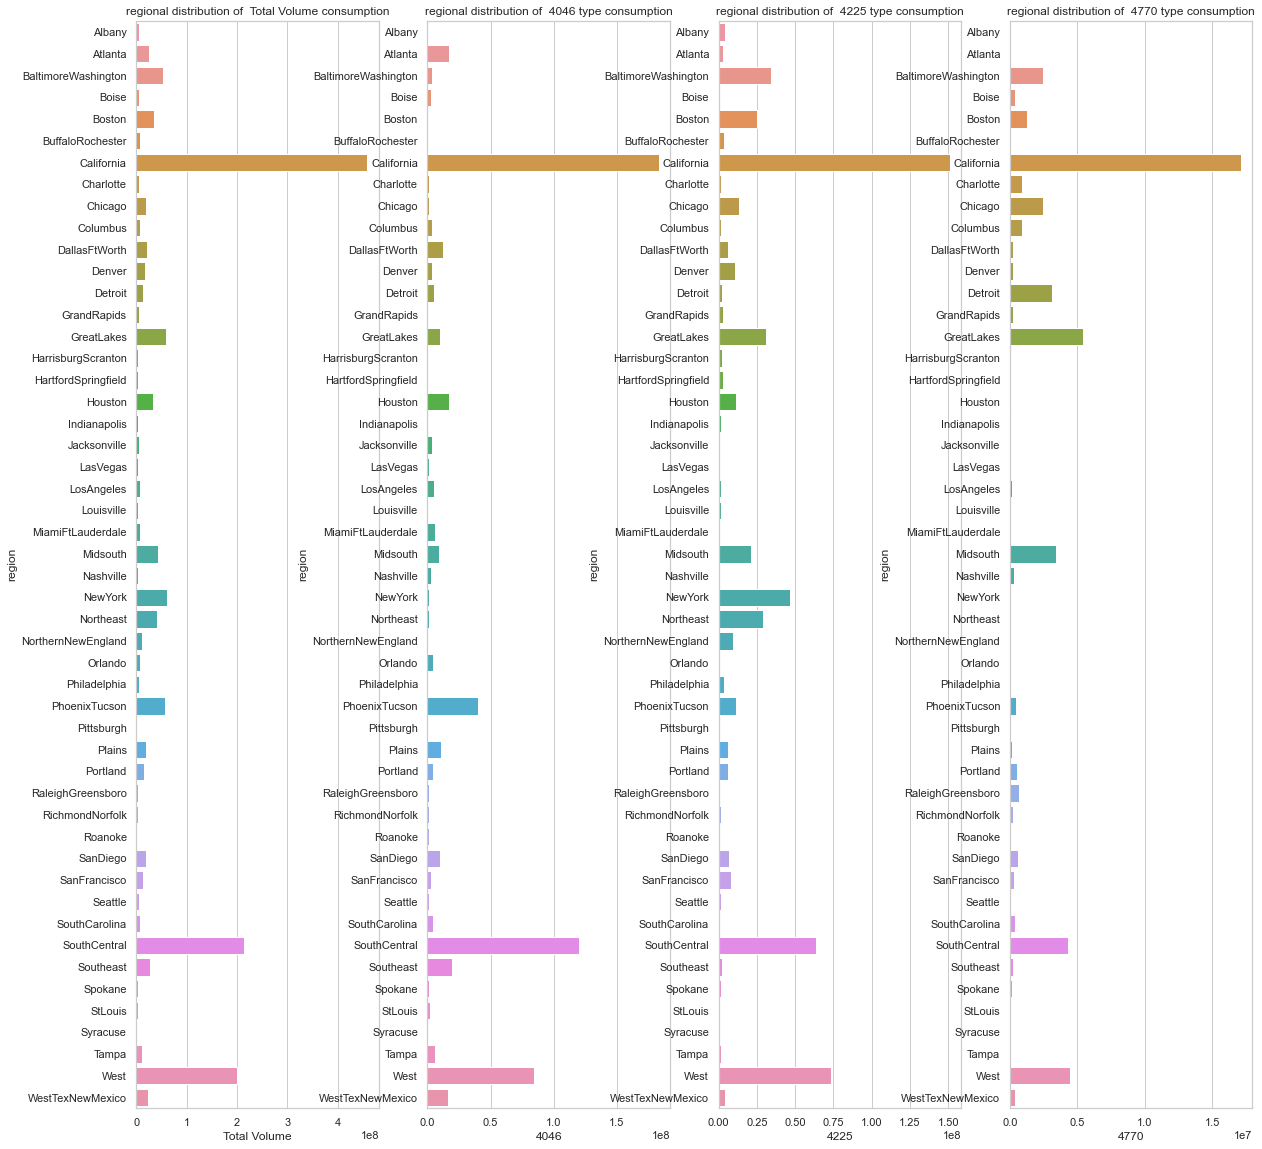

In [296]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))
sns.barplot(x=df4["Total Volume"],y=df4.index,ax=ax1)
ax1.set_title("regional distribution of  Total Volume consumption")
sns.barplot(x=df4["4046"],y=df4.index,ax=ax2)
ax2.set_title("regional distribution of  4046 type consumption")
sns.barplot(x=df4["4225"],y=df4.index,ax=ax3)
ax3.set_title("regional distribution of  4225 type consumption")
sns.barplot(x=df4["4770"],y=df4.index,ax=ax4)
ax4.set_title("regional distribution of  4770 type consumption")

In [297]:
#Observation
print("maximum number of avacados sold","\n",df4[df4["Total Volume"] == df4["Total Volume"].max()]  )
print("\n")
print("mainimum number of avacados sold","\n",df4[df4["Total Volume"] == df4["Total Volume"].min()]  )

maximum number of avacados sold 
             Total Volume          4046          4225         4770
region                                                           
California  4.586810e+08  1.831613e+08  1.508466e+08  17123902.95


mainimum number of avacados sold 
           Total Volume      4046       4225    4770
region                                             
Syracuse     922989.83  21006.15  469298.26  516.71


<Figure size 2160x2160 with 0 Axes>

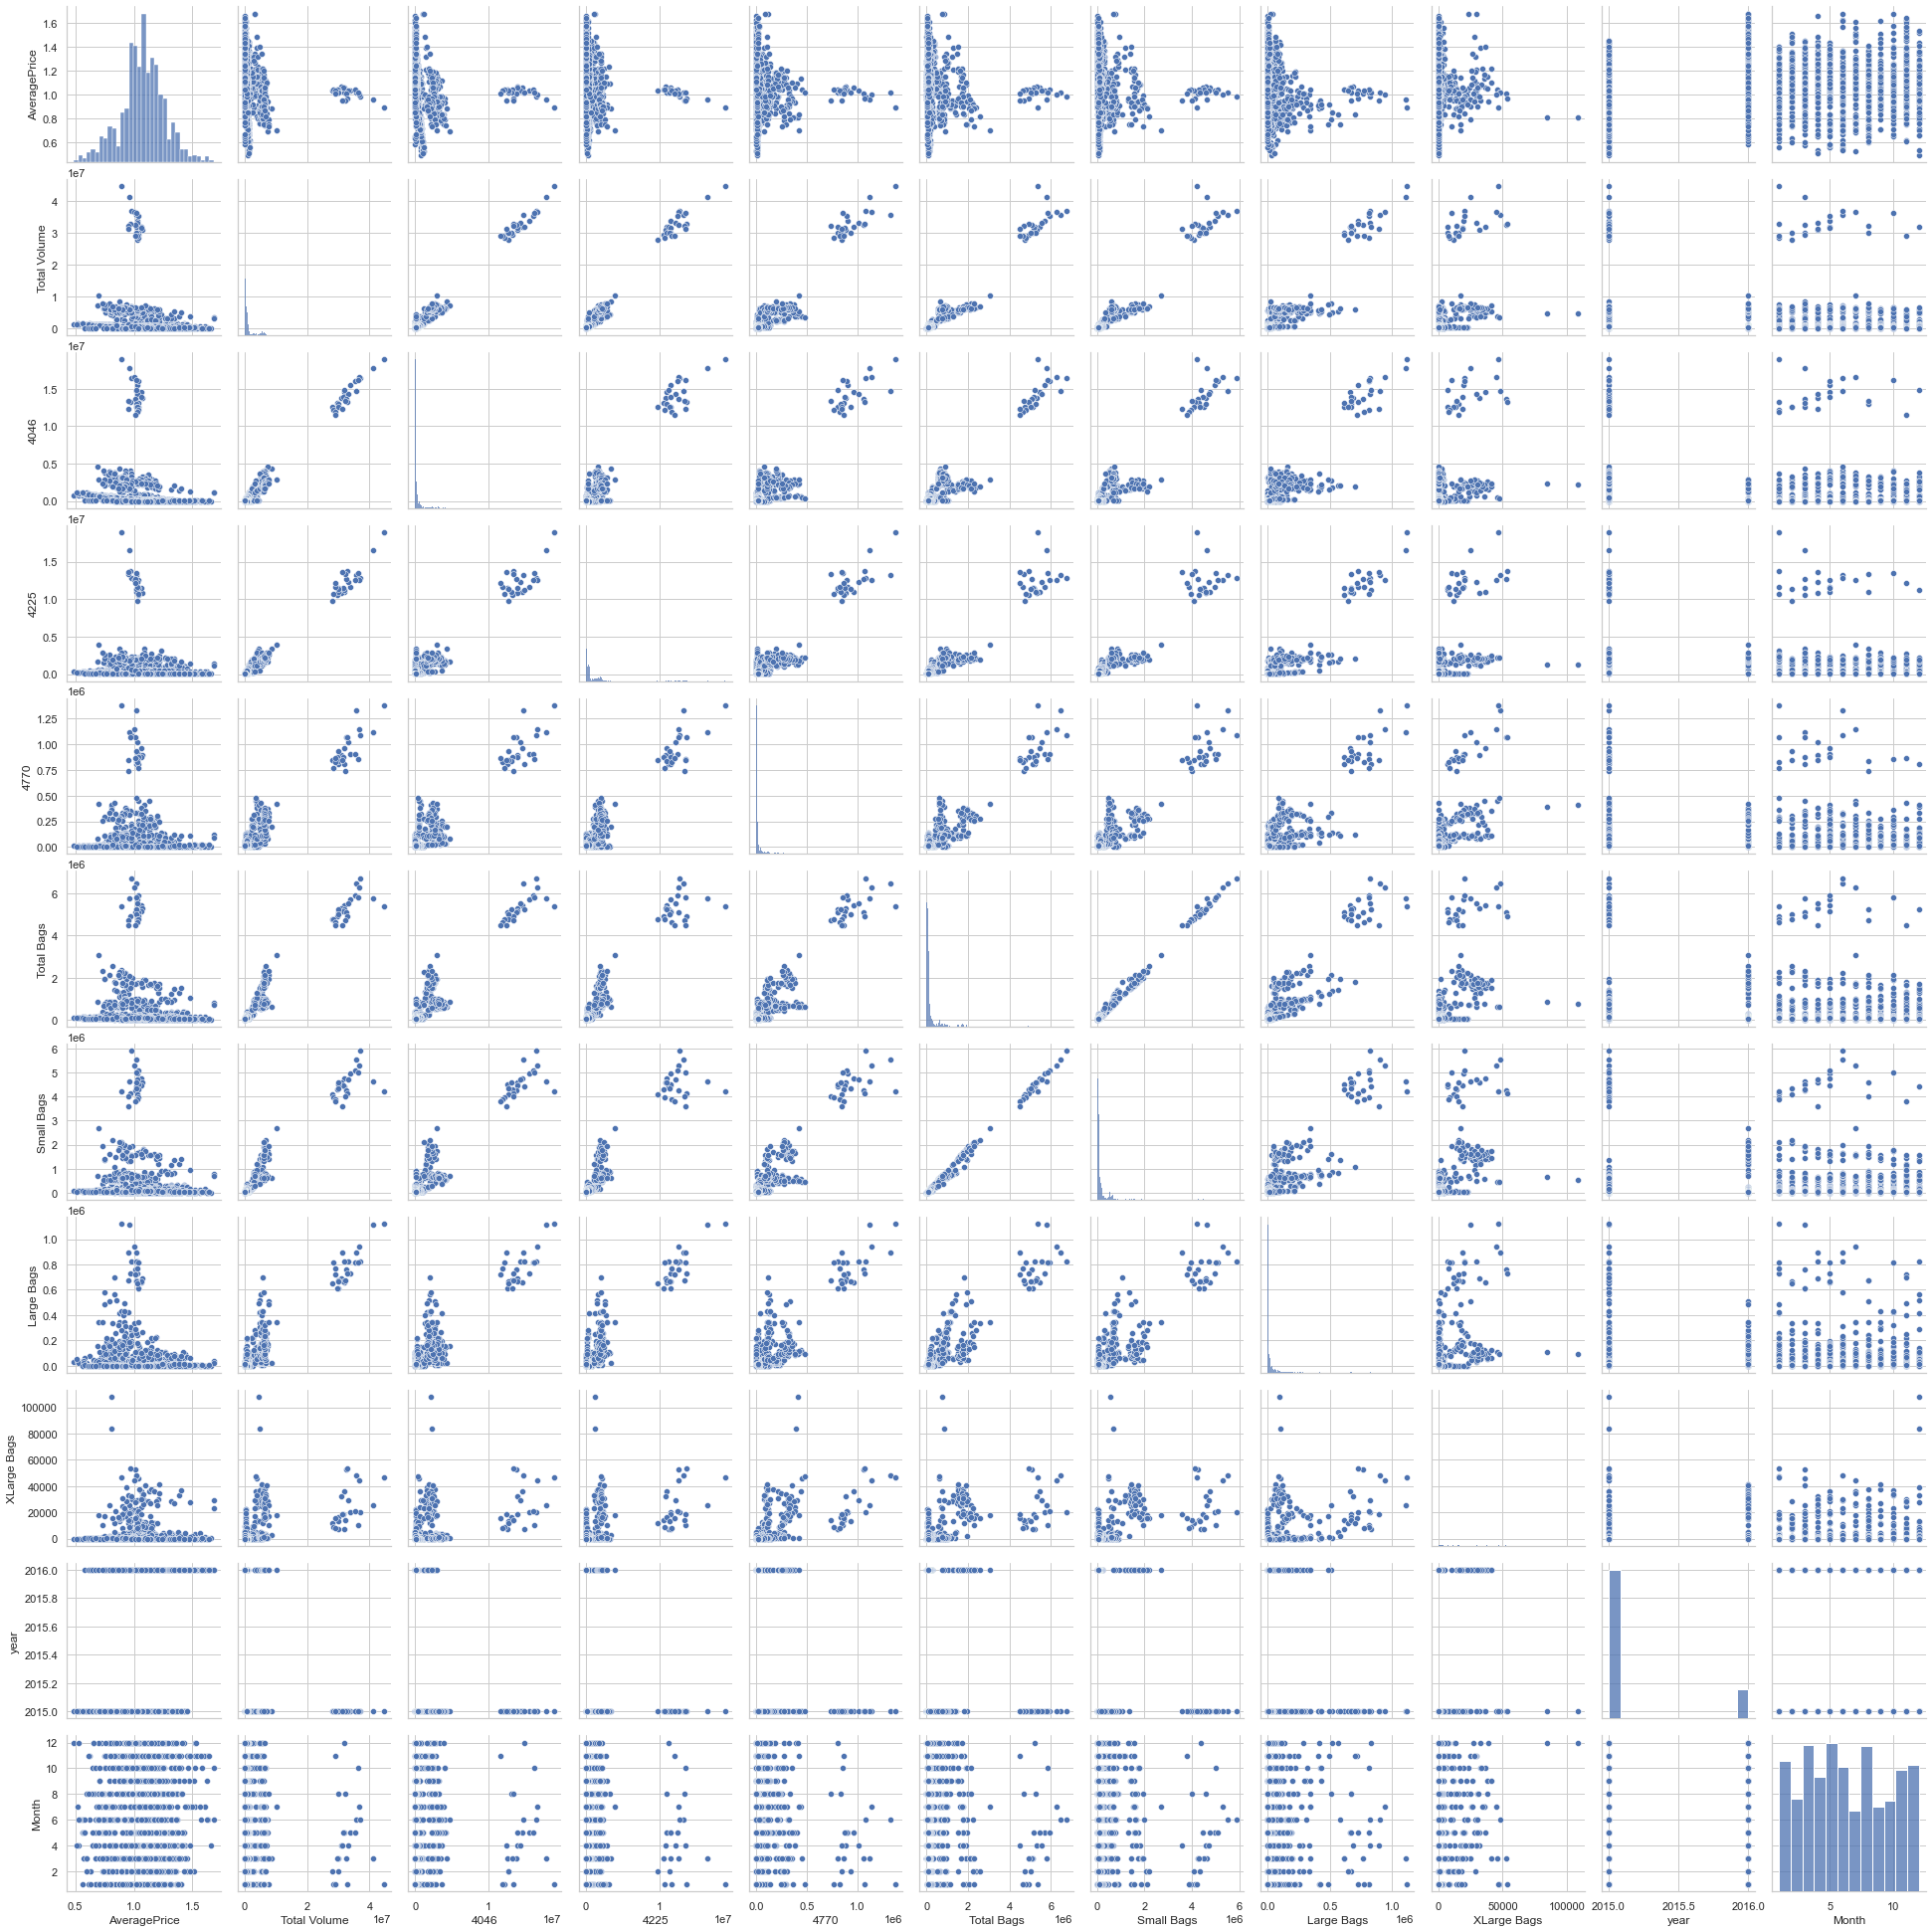

In [298]:
#checking the pairplot and analysisng corelation among all the columns
plt.figure(figsize=(30,30))
sns.pairplot(df)

In [299]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144


#from the table and graph wew can see columns like total bags, total volumn,small bags, large bags, 4046 4225,4770 all are highly corelated to each other


AveragePrice       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Total Volume    AxesSubplot(0.327174,0.657941;0.168478x0.222059)
4046            AxesSubplot(0.529348,0.657941;0.168478x0.222059)
4225            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
4770               AxesSubplot(0.125,0.391471;0.168478x0.222059)
Total Bags      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Small Bags      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Large Bags      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
XLarge Bags           AxesSubplot(0.125,0.125;0.168478x0.222059)
year               AxesSubplot(0.327174,0.125;0.168478x0.222059)
Month              AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

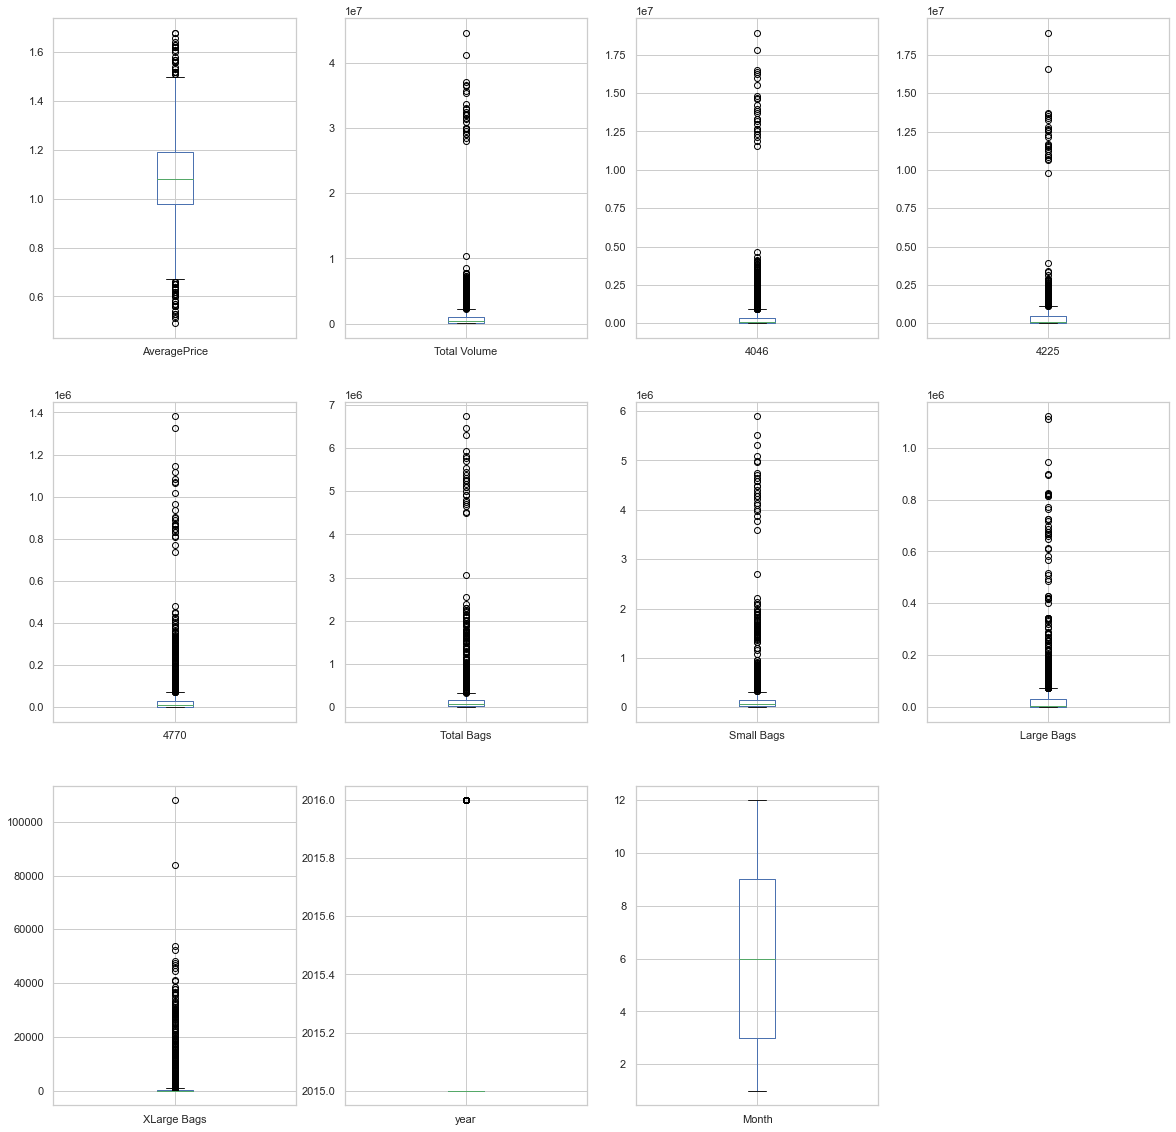

In [300]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(3,4),figsize=(20,20))

In [301]:
#exept month all the columns have outliers
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month'],
      dtype='object')

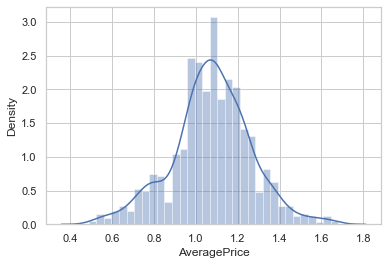

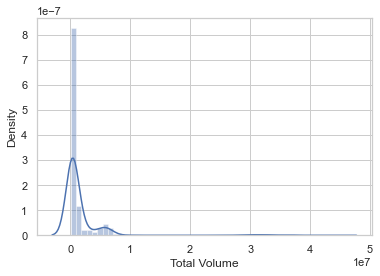

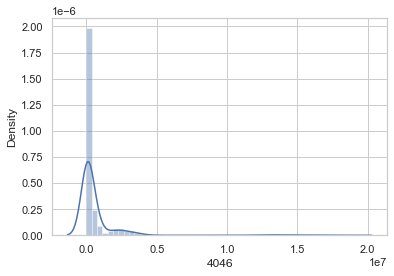

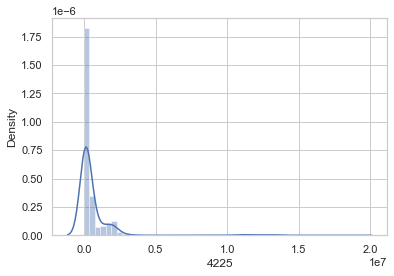

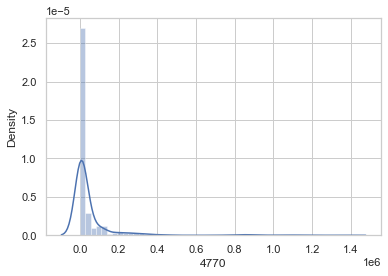

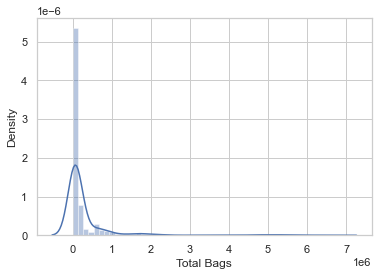

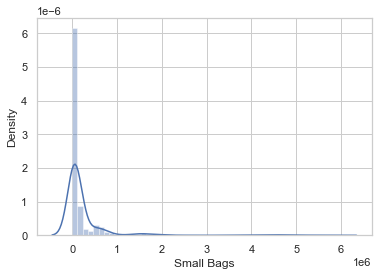

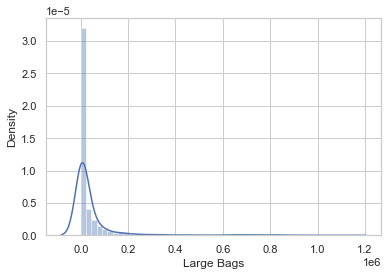

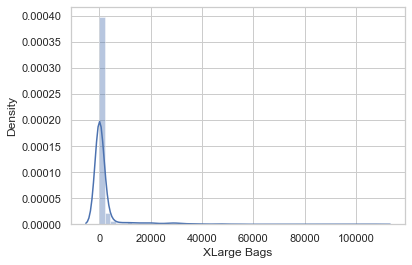

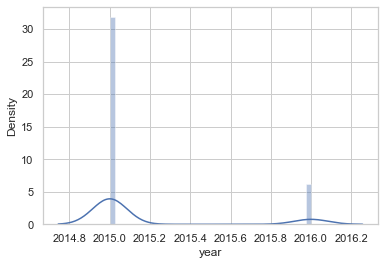

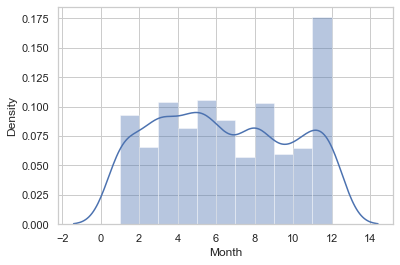

In [302]:
#Cheking skewness
list1=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month']
for i in list1:
    sns.distplot(df[i])
    plt.show()

In [303]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
dtype: float64

In [304]:
#exept month and average price all are highly skewed
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month'],
      dtype='object')

# Data cleaning and transformation

In [315]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df.drop(labels="region",axis=1)))
z

(1517, 12)


array([[1.35048079, 0.34696593, 0.33149016, ..., 0.29272731, 0.44100815,
        1.62415427],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.29272731, 0.44100815,
        1.62415427],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.29272731, 0.44100815,
        1.62415427],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.1820374 , 2.26753179,
        1.25685839],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.29272731, 2.26753179,
        0.75985047],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.29272731, 2.26753179,
        0.75985047]])

In [316]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((1517-1436)/1517)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(1436, 12)
using z score percentage of outlier removed: 5.339485827290705


In [319]:
#Transforming the catagorical data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['region','year']
for i in variable:
    df_new[i] = lb.fit_transform(df_new[i])

In [320]:

df_new.skew()


AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.264436
Month           0.111898
dtype: float64

In [321]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(df_new))


StandardScaler()


In [322]:
#This x1 and y1 is for linear prediction
x1=df_new.drop(labels="AveragePrice",axis=1)
y1=df_new["AveragePrice"]


In [396]:
#This x1 and y1 is for linear prediction
x=df_new.drop(labels="region",axis=1)
y=df_new["region"]

In [330]:
#removing the skewness
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method=("yeo-johnson"))
x2=power_transform(x2,method=("yeo-johnson"))
x1=pd.DataFrame(x1)
x2=pd.DataFrame(x2)
print(x1.skew(),"\n",x2.skew())


0     0.000000
1     0.027459
2    -0.044745
3     0.036059
4    -0.007838
5     0.005661
6     0.014661
7     0.222605
8     2.004439
9     0.002155
10   -0.010064
dtype: float64 
 0     0.023562
1     0.000000
2     0.027459
3    -0.044745
4     0.036059
5    -0.007838
6     0.005661
7     0.014661
8     0.222605
9     2.004439
10   -0.010064
dtype: float64


# Model Fitting( average prize prediction)

In [331]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [332]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=x)
        md=model()
        md.fit(x1_train,y1_train)
        predict=md.predict(x1_test)
        r2score=r2_score(y1_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [333]:
model_select(LinearRegression)

Max score is 0.4110131901796411 with random state 73


In [334]:
model_select(KNeighborsRegressor)

Max score is 0.7646572485731606 with random state 63


In [335]:
model_select(DecisionTreeRegressor)

Max score is 0.753503972718066 with random state 86


In [363]:
model_select(SVR)

Max score is 0.7692612518102134 with random state 50


In [336]:
model_select(Ridge)

Max score is 0.4085394265124558 with random state 73


In [339]:
model_select(RandomForestRegressor)

Max score is 0.8429457291323819 with random state 86


In [344]:
#from above model performance we can see that RandomForestRegressor gives best accuracy with random state 86 so lets proceed with that model

In [405]:
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=86)
print(x_train.shape, x_test.shape)

(962, 11) (474, 11)


In [346]:
cross_val_score(RandomForestRegressor(),x1_train,y1_train,cv=5).mean()

0.7428485587233455

In [348]:
rg=RandomForestRegressor()
rg.fit(x1_train,y1_train)
print(rg.score(x1_train, y1_train))

0.9679343964128582


In [355]:
predict=rg.predict(x1_test)

pd.Series(predict)


0      0.9472
1      0.8791
2      1.2441
3      1.2172
4      1.0802
        ...  
469    1.4707
470    0.7977
471    1.1107
472    1.1045
473    1.2227
Length: 474, dtype: float64

In [356]:
print("R2 score is "+str(r2_score(y1_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y1_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y1_test,predict)))

R2 score is 0.8467052793341285
Mean absolute error is 0.05978797468354433
Mean squared error is 0.006031597194092833


In [357]:
y1_test

1054    0.83
957     0.87
693     1.27
395     1.31
985     1.05
        ... 
1280    1.40
1262    0.85
403     1.05
185     1.08
162     1.19
Name: AveragePrice, Length: 474, dtype: float64

Text(0, 0.5, 'Predicted Y')

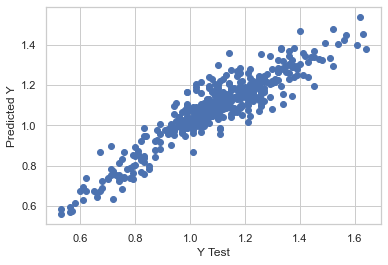

In [358]:
# Plotting the actual y and predicted y
plt.scatter(x=y1_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [359]:
#lets save this model since we have satisfied with the accuracy
#now we can the predict the avarage price of avacado sold based on the atributes values
import pickle

In [360]:
filename="avacado_regression.pkl"
pickle.dump(rg,open(filename,"wb"))

# Model Fitting(Region prediction)

In [391]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [403]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [369]:
model_select(SVC)

Max score is 0.9029535864978903 with random state 94


In [370]:
model_select(LogisticRegression)

Max score is 0.9071729957805907 with random state 94


In [371]:
model_select(GaussianNB)

Max score is 0.9071729957805907 with random state 68


In [377]:
model_select(RandomForestClassifier)

Max score is 0.9873417721518988 with random state 76


In [378]:
model_select(KNeighborsClassifier)

Max score is 0.879746835443038 with random state 69


In [375]:
model_select(DecisionTreeClassifier)

Max score is 0.9050632911392406 with random state 69


In [376]:
model_select(AdaBoostClassifier)

Max score is 0.20464135021097046 with random state 49


In [379]:
#From the above model training we can see random forest performs best at random state 76 lets proceed with these values

In [404]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=76)
print(x_train.shape, x_test.shape)

(962, 11) (474, 11)


In [407]:
cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()

0.9563687392055268

In [408]:
#CV score and accuracy score is nearly same..will go for optimization for better accuracy

In [414]:
#optimization
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [415]:
rf= RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=15)

In [425]:
rf = grid_cv.best_estimator_

rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print("confusion matrix",confusion_matrix(y_test,pred_rf ))
print("\n")
print("classificationreport", classification_report(y_test,pred_rf))
print("accuracy score",accuracy_score(y_test,pred_rf))

confusion matrix [[20  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  1  0 ...  6  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0 10]]


classificationreport               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        25
           5       0.95      1.00      0.97        19
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      0.89      0.94         9
          13       0.83      1.00      0.91    

<AxesSubplot:>

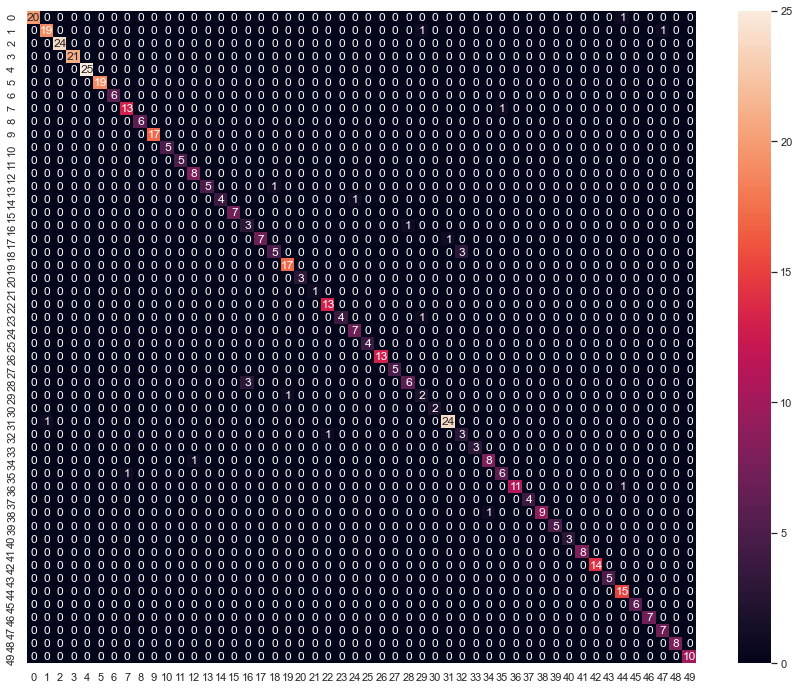

In [418]:
#confusion matrix in heat map
plt.figure(figsize=(15,12))
sns.heatmap(confusion_matrix(pred_rf, y_test), annot=True)

Text(0, 0.5, 'Predicted Y')

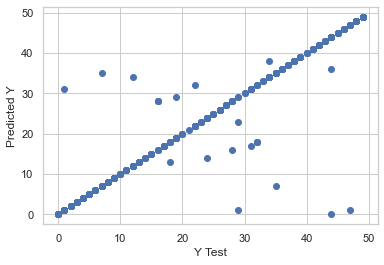

In [419]:
# Plotting the actual y and predicted y
plt.scatter(x=y_test,y=pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#Graph show the values predicted by model campared to actual values of y
#now we can find the predict the region of avacado sold based on the attribute values
#saving the model


In [423]:
import pickle
filename="avacado_clasification.pkl"
pickle.dump(rf,open(filename,"wb"))